# EDA 2
## 해야할 것
2019.12.14 ~

1. 고객 클러스터링 돌려보기
2. 시간 범주화 시켜서 변수로 만들기 ㅇ
3. 외부데이터 찾아두기
4. 키워드 전처리 : 특수문자 딱히 없음
5. biz_unit ??????
6. aciontype 2->3 


## 알아낸 것
1. trans_id가 없으면 sech_kwd가 없다 = sech키워드만 빼와서 전처리해도 될듯
2. 연관성분석 새롭게 알만한 것 없음

### import package

In [1]:
# -*- coding: cp949 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pandas_profiling as pp
import datetime

from datetime import time
from IPython.display import Image
%matplotlib inline

In [2]:
# matplotlib 한글 적용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/DXMSubtitlesM-KSCpc-EUC-H.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 코드 수행 시간 측정
start = timeit.default_timer()
stop = timeit.default_timer()
# print(stop - start)

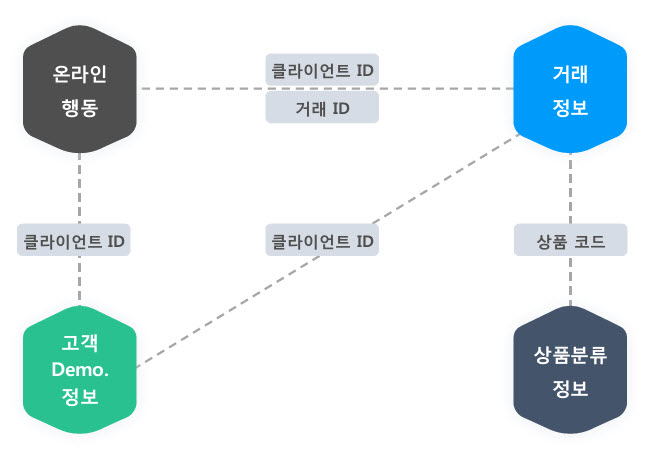

In [4]:
Image("데이터 흐름도.jpg")

In [5]:
online = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
transaction = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv')
client = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
products = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

C:\Users\huiyeon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 전체 merge
온라인행동정보(online) + 고객정보(client) + 거래정보(transaction) + 상품(products) 

*상품(products)넘버가 없는 unknown존재하여 products에 행 추가*

 - trans_id가 있으면, sech_kwd가 없다

In [343]:
# merge -> 전처리
online_client = pd.merge(online, client, on=['clnt_id'])
online_client_transaction = pd.merge(online_client, transaction, on=['clnt_id', 'trans_id'])  # how='left' 뺴면 구매고객만
online_client_transaction['pd_c'] = pd.to_numeric(online_client_transaction['pd_c'],
                                                  errors='coerce')
All_data = pd.merge(online_client_transaction,
                    products, on=['pd_c'], how='left')

All_data.sort_values(['clnt_id', 'sess_id', 'trans_seq'], inplace=True)
All_data.reset_index(inplace=True)
All_data.drop(['index'], axis=1, inplace=True)
All_data.drop(['biz_unit_y'], axis=1, inplace=True)
All_data.rename(columns={'biz_unit_x': 'biz_unit'}, inplace=True)

All_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,30,1,92.0,20190729,23:47,36000,20,Beverages,Coffee Drinks,Coffee Drinks
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,1,186.0,20190731,21:25,3790,1,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,2,151.0,20190731,21:25,3990,1,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,3,351.0,20190731,21:25,4690,1,Dairy Products,Processed Dairy Products,Cream and Condensed milk
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,4,189.0,20190731,21:25,4290,1,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu


In [7]:
np.sum(pd.isnull(All_data))

clnt_id                 0
sess_id                 0
hit_seq                 0
action_type             0
biz_unit                0
sess_dt                 0
hit_tm                  0
hit_pss_tm              0
trans_id                0
sech_kwd           127358
tot_pag_view_ct         0
tot_sess_hr_v         300
trfc_src                0
dvc_ctg_nm          91475
clnt_gender             0
clnt_age                0
trans_seq               0
pd_c                 4263
de_dt                   0
de_tm                   0
buy_am                  0
buy_ct                  0
clac_nm1             4263
clac_nm2             4263
clac_nm3             4268
dtype: int64

In [8]:
# EDA 레포트 생성
pr = All_data.profile_report()  # 프로파일링 결과 리포트를 pr에 저장
# data.profile.report() # 바로 결과 보기
pr.to_file('./pr_report.html')  # pr_report.html 파일로 저장

In [344]:
All_data['de_tm'] = pd.to_datetime(All_data['de_tm'], format='%H:%M')
All_data['de_hour'] = All_data['de_tm'].dt.hour
All_data['de_tm'] = pd.to_datetime(All_data['de_tm'], format='%H:%M').dt.time
All_data[['de_tm', 'de_hour']]

,de_tm,de_hour
0,23:47:00,23
1,21:25:00,21
2,21:25:00,21
3,21:25:00,21
4,21:25:00,21
...,...,...
127353,09:46:00,9
127354,13:59:00,13
127355,11:48:00,11
127356,17:12:00,17


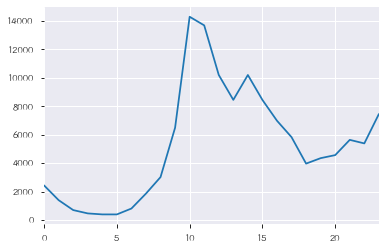

In [345]:
All_data.de_hour.value_counts().sort_index().plot()

### 시간 범주화

In [350]:
# 시간 범주화
# 0-3, 3-6, 6-9, 9-12, 12-15, 15-18, 18-21, 21-0
def Time_change(time_var):
    time_dic = []
    for i in range(len(time_var)):
        hour = All_data.de_tm[i].hour
        if hour >= 0 and hour < 3:
            time_dic.append('00시-03시')
        elif hour >= 3 and hour < 6:
            time_dic.append('03시-06시')
        elif hour >= 6 and hour < 9:
            time_dic.append('06시-09시')
        elif hour >= 9 and hour < 12:
            time_dic.append('09시-12시')
        elif hour >= 12 and hour < 15:
            time_dic.append('12시-15시')
        elif hour >= 15 and hour < 18:
            time_dic.append('15시-18시')
        elif hour >= 18 and hour < 21:
            time_dic.append('18시-21시')
        elif hour >=21 or hour < 0:
            time_dic.append('21시-00시')
    return time_dic  

All_data['dt_dic'] = Time_change(All_data.de_tm)

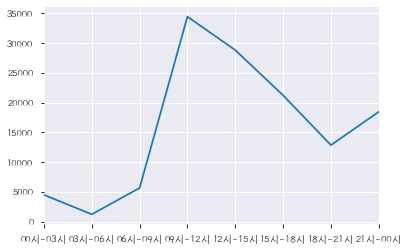

In [351]:
All_data.dt_dic.value_counts().sort_index().plot()

### 키워드 전처리
- 두가지 키워드 나눠줘야할까?


In [16]:
import re

In [18]:
# online + client 데이터 사용하여 키워드 전처리
online_client[online_client['sech_kwd'].notnull()].head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
97,30605,16,1,0,A03,20190907,22:04,14548,NaN,버터,3.0,39.0,DIRECT,NaN,unknown,unknown
98,30605,12,2,0,A03,20190821,23:36,422952,NaN,카누,5.0,467.0,DIRECT,NaN,unknown,unknown
99,30605,13,1,0,A03,20190822,14:47,0,NaN,카누,1.0,NaN,DIRECT,NaN,unknown,unknown
116,28304,1,13,0,A03,20190716,11:36,933562,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,F,50
117,28304,1,11,0,A03,20190716,11:35,820901,NaN,어묵,56.0,1303.0,PUSH,mobile_web,F,50


In [23]:
# 전처리가 아니라 두가지 키워드 나눠줘야할까?????
pd.set_option('display.max_rows', 50)  # 전체 데이터 살펴보기
online_client[online_client['sech_kwd'].notnull()].sech_kwd

97                 버터
98                 카누
99                 카누
116             비비고만두
117                어묵
              ...    
3196357          노니구미
3196358    디스커버리여성반팔티
3196359           볼링티
3196360        여성메탈시계
3196361        여성메탈시계
Name: sech_kwd, Length: 651638, dtype: object

### 연관성 분석
: 중분류 아무것도 안나옴, 대분류 지지도 0.01일 때만 나오는데 쓸모없음

In [72]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [24]:
TT = All_data.copy()
TT.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,de_hour,dt_dic
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,92.0,20190729,23:47:00,36000,20,Beverages,Coffee Drinks,Coffee Drinks,23,21시-0시
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,186.0,20190731,21:25:00,3790,1,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks,21,21시-0시
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,151.0,20190731,21:25:00,3990,1,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods,21,21시-0시
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,351.0,20190731,21:25:00,4690,1,Dairy Products,Processed Dairy Products,Cream and Condensed milk,21,21시-0시
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,189.0,20190731,21:25:00,4290,1,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu,21,21시-0시


In [146]:
ex1 = TT[['trans_id','clac_nm1','clac_nm2']]
ex1.dropna(inplace=True)

In [168]:
# NaN : Error
dataset = ex1.groupby('trans_id', sort=False).clac_nm2.apply(lambda x : ', '.join(set(x))).reset_index()
dataset1 = ex1.groupby('trans_id', sort=False).clac_nm1.apply(lambda x : ', '.join(set(x))).reset_index()

In [169]:
for i in range(len(dataset1)):
    dataset1.clac_nm1[i] = dataset1.clac_nm1[i].split(',')

dataset1.drop('trans_id', axis=1)

,clac_nm1
0,[Beverages]
1,"[Chilled Foods, Beverages, Dairy Products, ..."
2,[Beverages]
3,[Substitute Foods]
4,"[Spices / Seasonings, Frozen Foods, Snack Fo..."
...,...
21797,[Other Products]
21798,[Personal Care]
21799,[Dairy Products]
21800,[Cell Phones / Accessories]


In [183]:
Row_list =[] 
  
for rows in dataset1.itertuples(): 
    my_list = rows.clac_nm1
    Row_list.append(my_list) 

In [174]:
te = TransactionEncoder()
te_ary = te.fit(dataset1.clac_nm1).transform(dataset1.clac_nm1)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Automotive Products,Baby Foods,Ball Game / Field Sports,Bedding / Handicraft,Beverages,Birth Supplies / Baby Products,Books / Records / Instruments,Canned / Jarred Foods,Cell Phones / Accessories,Chilled Foods,...,Stationary / Office Supplies,Substitute Foods,Tableware / Cooking Utensils,Tools / Safety Supplies,Toy,Travel / Leisure Services,Underwear / Socks and Hosiery / Homewear,Vegetables,Video / Audio System Electronics,Women's Clothing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [182]:
frequent = apriori(df, min_support=0.1, use_colnames=True)
frequent

,support,itemsets
0,0.203835,( Beverages)
1,0.304697,( Dairy Products)
2,0.100771,( Detergents / Hygiene Goods)
3,0.185809,( Frozen Foods)
4,0.220393,( Fruits)
5,0.119530,( Meats)
6,0.203926,( Snack Foods)
7,0.104761,( Spices / Seasonings)
8,0.297312,( Substitute Foods)
9,0.291028,( Vegetables)


In [180]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent, metric='confidence', min_threshold=0.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### 파생변수 생성

날짜관련 변수 : sess_dt(세션일자), de_dt(구매일자)

1. 구매총액(buy_total) 변수 생성
2. 날짜 파생변수 : 요일변수(de_week, sess_week), 월변수(de_month, sess_month), 주말변수(de_holiday, sess_holiday), 황금연휴(de_gold, sess_gold) 생성

#### 구매일자(de_dt)에 코드 실행

In [352]:
## 1.구매총액(buy_total) 변수 생성
All_data['buy_total'] = All_data['buy_am'] * All_data['buy_ct']

## 2. 날짜 파생변수 생성
# 황금연휴 변수(golden_time) 생성
# 20190815 ~ 18, 20190912~15
golden = list(range(20190815, 20190818)) + list(range(20190912, 20190915))
All_data['de_gold'] = All_data['de_dt'].apply(lambda x:1 if x in golden else 0)
#All_data.golden_time.value_counts()  # 0:False, 1:True

# 요일변수(de_week), 월변수(de_month), 주말변수(holiday) 생성
All_data['dt_datetime'] = pd.to_datetime(All_data['de_dt'],format='%Y%m%d').dt.dayofweek
convert_week = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금',
                5:'토', 6:'일'}
All_data['de_month'] = pd.to_datetime(All_data['de_dt'],format='%Y%m%d').dt.month
All_data['de_week'] = All_data['dt_datetime'].apply(lambda x: convert_week[x])
All_data['de_holiday'] = All_data['dt_datetime'].apply(lambda x:1 if x in (5,6) else 0)

#### 세션일자(sess_dt)에 코드 실행

In [353]:
# 황금연휴 변수 생성(sess_golden_time)
# 20190815 ~ 18, 20190912~15
golden = list(range(20190815, 20190818)) + list(range(20190912, 20190915))
All_data['sess_gold'] = All_data['sess_dt'].apply(lambda x:1 if x in golden else 0)
#All_data.golden_time.value_counts()  # 0:False, 1:True

# 요일변수(de_week), 월변수(de_month), 황금연휴변수(holiday) 생성
All_data['sess_datetime'] = pd.to_datetime(All_data['sess_dt'],format='%Y%m%d').dt.dayofweek
convert_week = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금',
                5:'토', 6:'일'}
All_data['sess_month'] = pd.to_datetime(All_data['sess_dt'],format='%Y%m%d').dt.month
All_data['sess_week'] = All_data['sess_datetime'].apply(lambda x: convert_week[x])
All_data['sess_holiday'] = All_data['sess_datetime'].apply(lambda x:1 if x in (5,6) else 0)

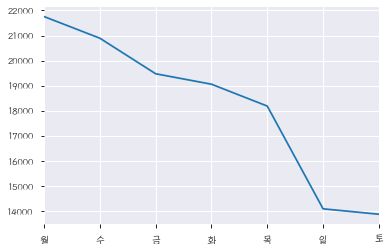

In [354]:
All_data['de_week'].value_counts().plot()

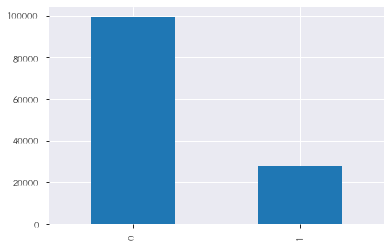

In [355]:
All_data['de_holiday'].value_counts().plot(kind='bar')

In [356]:
All_data.columns

Index(['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'biz_unit', 'sess_dt',
       'hit_tm', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm', 'clnt_gender', 'clnt_age',
       'trans_seq', 'pd_c', 'de_dt', 'de_tm', 'buy_am', 'buy_ct', 'clac_nm1',
       'clac_nm2', 'clac_nm3', 'de_hour', 'dt_dic', 'buy_total', 'de_gold',
       'dt_datetime', 'de_month', 'de_week', 'de_holiday', 'sess_gold',
       'sess_datetime', 'sess_month', 'sess_week', 'sess_holiday'],
      dtype='object')

In [357]:
All_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,de_gold,dt_datetime,de_month,de_week,de_holiday,sess_gold,sess_datetime,sess_month,sess_week,sess_holiday
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,0,0,7,월,0,0,6,7,일,1
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0


In [416]:
All_data.to_csv('All_data.csv', index=False)

In [417]:
testttt = pd.read_csv('All_data.csv')
testttt.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,de_gold,dt_datetime,de_month,de_week,de_holiday,sess_gold,sess_datetime,sess_month,sess_week,sess_holiday
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,0,0,7,월,0,0,6,7,일,1
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,0,2,7,수,0,0,2,7,수,0


### 고객 클러스터링
 - 구매고객과 미구매고객 따로 클러스터링 해주기
     - K-means, 계층형클러스터링 두가지 방법으로 해보기
 - 범주형 자료 임베딩 필요 = 변수들 간의 관계를 알 수 없음

#### 1. 구매고객에 사용할 변수
: 연속형 변수 모두 넣어보기


구매일자(de_dt), 구매금액(buy_am), 구매수량(buy_ct), 연령대(clnt_age), 세션일자(sess_dt), 조회시각(hit_tm), 조회경과시간(hit_pss_tm), 총페이지조회건수(tot_pag_view_ct), 총세션시간값(tot_sess_hr_v), 구매총액(buy_total), 월(de_month, sess_month), 주말(0,1)(de_holiday, sess_holiday), 황금연휴(de_gold, sess_gold)

#### 2. 미구매고객에 사용할 변수

In [358]:
# 상관관계 조사
corr= All_data.corr()
corr

,clnt_id,sess_id,hit_seq,action_type,sess_dt,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trans_seq,...,de_hour,buy_total,de_gold,dt_datetime,de_month,de_holiday,sess_gold,sess_datetime,sess_month,sess_holiday
clnt_id,1.000000,0.036543,0.018961,-0.010826,0.006616,0.012794,0.004987,0.003751,0.013128,0.008608,...,0.012159,0.002195,0.002340,-0.003215,0.005551,-0.001609,0.003301,-0.013165,0.007482,-0.005250
sess_id,0.036543,1.000000,0.015800,-0.009160,0.347683,0.033710,0.358736,0.053676,0.062863,0.021681,...,0.038674,-0.001443,0.027945,0.012238,0.337754,0.007428,0.024446,0.000651,0.336171,-0.002944
hit_seq,0.018961,0.015800,1.000000,-0.153724,0.026657,0.661756,0.031788,0.794664,0.616933,0.199274,...,0.028701,-0.003043,0.011507,0.009613,0.028703,0.011389,0.010841,0.005642,0.024884,0.003200
action_type,-0.010826,-0.009160,-0.153724,1.000000,0.008356,-0.117766,-0.003747,-0.094597,-0.088396,-0.165118,...,-0.034091,-0.000541,0.021427,0.025094,-0.003023,0.023670,0.015287,0.033436,0.009117,0.026539
sess_dt,0.006616,0.347683,0.026657,0.008356,1.000000,0.027073,0.972231,0.011695,0.022413,0.015110,...,0.008637,0.001429,0.092487,0.028805,0.989785,0.042855,0.100348,0.027217,0.994041,0.040907
hit_pss_tm,0.012794,0.033710,0.661756,-0.117766,0.027073,1.000000,0.031533,0.676046,0.944739,0.131620,...,0.055138,-0.001519,0.019205,0.009434,0.029597,0.005453,0.018095,0.004761,0.025798,-0.002221
trans_id,0.004987,0.358736,0.031788,-0.003747,0.972231,0.031533,1.000000,0.019760,0.027709,0.015855,...,0.015846,0.002161,0.084483,0.036242,0.941901,0.046785,0.091939,0.035185,0.941278,0.042185
tot_pag_view_ct,0.003751,0.053676,0.794664,-0.094597,0.011695,0.676046,0.019760,1.000000,0.705788,0.091466,...,0.005678,-0.003169,0.010621,0.001891,0.013283,0.003257,0.009544,0.004179,0.009008,0.002466
tot_sess_hr_v,0.013128,0.062863,0.616933,-0.088396,0.022413,0.944739,0.027709,0.705788,1.000000,0.104820,...,0.050491,0.000751,0.019932,0.015138,0.024332,0.009775,0.016313,0.011428,0.020776,0.003356
trans_seq,0.008608,0.021681,0.199274,-0.165118,0.015110,0.131620,0.015855,0.091466,0.104820,1.000000,...,0.009466,-0.001583,-0.010124,0.019451,0.016191,0.001388,-0.009965,0.011651,0.014732,-0.008503


In [359]:
corr.sess_dt.sort_values(ascending= False)
# 시간/날짜 변수끼리 상관관계 높음

sess_dt            1.000000
de_dt              0.996767
sess_month         0.994041
de_month           0.989785
trans_id           0.972231
sess_id            0.347683
sess_gold          0.100348
de_gold            0.092487
de_holiday         0.042855
sess_holiday       0.040907
dt_datetime        0.028805
sess_datetime      0.027217
hit_pss_tm         0.027073
hit_seq            0.026657
tot_sess_hr_v      0.022413
trans_seq          0.015110
tot_pag_view_ct    0.011695
de_hour            0.008637
action_type        0.008356
clnt_id            0.006616
pd_c               0.005130
buy_am             0.002967
buy_total          0.001429
buy_ct            -0.000241
Name: sess_dt, dtype: float64

In [363]:
buy_cluster = All_data[[
                       'de_dt', # 구매일자
                       'buy_am',  # 구매금액
                       'buy_ct',  # 구매수량
                       'clnt_age',  # 연령대
                       'sess_dt',  # 세션일자
                       'hit_tm',  # 조회시각
                       'hit_pss_tm',  # 조회경과시간
                       'tot_pag_view_ct',  # 총페이지조회건수
                       'tot_sess_hr_v',  # 총세션시간값
                       'buy_total',  # 구매총액
                       'de_month', 'sess_month',  # 월
                       'de_holiday', 'sess_holiday',  # 주말(0,1)
                       'de_gold', 'sess_gold']]  # 황금연휴
buy_cluster.head()

,de_dt,buy_am,buy_ct,clnt_age,sess_dt,hit_tm,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold
0,20190729,36000,20,30,20190728,23:47,791905,55.0,872.0,720000,7,7,0,1,0,0
1,20190731,3790,1,30,20190731,21:25,3251794,85.0,3256.0,3790,7,7,0,0,0,0
2,20190731,3990,1,30,20190731,21:25,3251794,85.0,3256.0,3990,7,7,0,0,0,0
3,20190731,4690,1,30,20190731,21:25,3251794,85.0,3256.0,4690,7,7,0,0,0,0
4,20190731,4290,1,30,20190731,21:25,3251794,85.0,3256.0,4290,7,7,0,0,0,0


In [364]:
# 상관관계
buy_cluster.corr()

,de_dt,buy_am,buy_ct,sess_dt,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold
de_dt,1.000000,0.002946,0.000133,0.996767,0.031152,0.015952,0.026150,0.001411,0.994043,0.989665,0.044061,0.040992,0.091781,0.099650
buy_am,0.002946,1.000000,0.002075,0.002967,-0.002432,-0.003858,-0.000937,0.857354,0.002651,0.002667,-0.002098,-0.002058,-0.000849,-0.000877
buy_ct,0.000133,0.002075,1.000000,-0.000241,0.000283,0.001375,0.005480,0.018131,0.000244,-0.000009,-0.002592,-0.002917,-0.001002,-0.001410
sess_dt,0.996767,0.002967,-0.000241,1.000000,0.027073,0.011695,0.022413,0.001429,0.989785,0.994041,0.042855,0.040907,0.092487,0.100348
hit_pss_tm,0.031152,-0.002432,0.000283,0.027073,1.000000,0.676046,0.944739,-0.001519,0.029597,0.025798,0.005453,-0.002221,0.019205,0.018095
tot_pag_view_ct,0.015952,-0.003858,0.001375,0.011695,0.676046,1.000000,0.705788,-0.003169,0.013283,0.009008,0.003257,0.002466,0.010621,0.009544
tot_sess_hr_v,0.026150,-0.000937,0.005480,0.022413,0.944739,0.705788,1.000000,0.000751,0.024332,0.020776,0.009775,0.003356,0.019932,0.016313
buy_total,0.001411,0.857354,0.018131,0.001429,-0.001519,-0.003169,0.000751,1.000000,0.001025,0.001041,-0.001839,-0.001805,-0.000745,-0.000768
de_month,0.994043,0.002651,0.000244,0.989785,0.029597,0.013283,0.024332,0.001025,1.000000,0.994083,0.041806,0.039565,0.093933,0.101437
sess_month,0.989665,0.002667,-0.000009,0.994041,0.025798,0.009008,0.020776,0.001041,0.994083,1.000000,0.040469,0.039318,0.094854,0.102427


In [365]:
# load packages
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster

In [373]:
# hit_tm(시각) -> 시, 분으로 분리하여 변수생성 필요
buy_cluster['hit_tm'] = pd.to_datetime(buy_cluster['hit_tm'], format='%H:%M')
buy_cluster['hit_hour'] = buy_cluster['hit_tm'].dt.hour
buy_cluster['hit_minute'] = buy_cluster['hit_tm'].dt.minute
buy_cluster.drop(['hit_tm'], axis=1, inplace=True)

In [374]:
buy_cluster
# de_dt - sess_dt 변수 생성해보는 것도 ㄱㅊ할듯

,de_dt,buy_am,buy_ct,clnt_age,sess_dt,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold,hit_hour,hit_minute
0,20190729,36000,20,30,20190728,791905,55.0,872.0,720000,7,7,0,1,0,0,23,47
1,20190731,3790,1,30,20190731,3251794,85.0,3256.0,3790,7,7,0,0,0,0,21,25
2,20190731,3990,1,30,20190731,3251794,85.0,3256.0,3990,7,7,0,0,0,0,21,25
3,20190731,4690,1,30,20190731,3251794,85.0,3256.0,4690,7,7,0,0,0,0,21,25
4,20190731,4290,1,30,20190731,3251794,85.0,3256.0,4290,7,7,0,0,0,0,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,20190731,78900,1,40,20190731,103042,9.0,103.0,78900,7,7,0,0,0,0,9,46
127354,20190726,14470,1,40,20190726,437775,19.0,961.0,14470,7,7,0,0,0,0,13,59
127355,20190917,479700,1,30,20190917,116283,24.0,114.0,479700,9,9,0,0,0,0,11,48
127356,20190924,14900,2,40,20190924,2410463,82.0,2445.0,29800,9,9,0,0,0,0,17,12


In [376]:
np.sum(pd.isnull(buy_cluster))  # 결측값 존재

de_dt                0
buy_am               0
buy_ct               0
clnt_age             0
sess_dt              0
hit_pss_tm           0
tot_pag_view_ct      0
tot_sess_hr_v      300
buy_total            0
de_month             0
sess_month           0
de_holiday           0
sess_holiday         0
de_gold              0
sess_gold            0
hit_hour             0
hit_minute           0
dtype: int64

In [378]:
# 결측값 0으로 치환
buy_cluster.fillna(0, inplace=True)

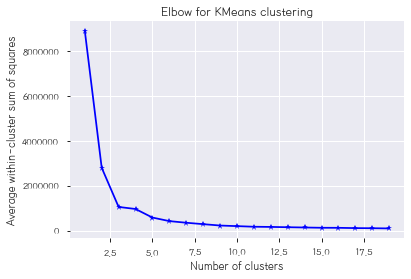

In [379]:
bdata = buy_cluster
K = range(1, 20)
KM = (sk_cluster.KMeans(n_clusters=k).fit(bdata) for k in K)
centroids = (k.cluster_centers_ for k in KM)

D_k = (sci_distance.cdist(bdata, cent, 'euclidean') for cent in centroids)
dist = (np.min(D, axis=1) for D in D_k)
avgWithinSS = [sum(d) / bdata.shape[0] for d in dist]
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()  # k=4

In [425]:
# 계층형 군집분석
from scipy.cluster.hierarchy import linkage, dendrogram

#mergings = linkage(bdata,method='complete')
#plt.figure(figsize=(40,20))
dendrogram(#  mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


NameError: name 'labels' is not defined

In [419]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(bdata)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
#ax.plot(bounds, [7.25, 7.25], '--', c='k')
#ax.plot(bounds, [4, 4], '--', c='k')

#ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
#ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

MemoryError: 

In [429]:
bdata

,de_dt,buy_am,buy_ct,clnt_age,sess_dt,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold,hit_hour,hit_minute,cluster
0,20190729,36000,20,30,20190728,791905,55.0,872.0,720000,7,7,0,1,0,0,23,47,0
1,20190731,3790,1,30,20190731,3251794,85.0,3256.0,3790,7,7,0,0,0,0,21,25,0
2,20190731,3990,1,30,20190731,3251794,85.0,3256.0,3990,7,7,0,0,0,0,21,25,0
3,20190731,4690,1,30,20190731,3251794,85.0,3256.0,4690,7,7,0,0,0,0,21,25,0
4,20190731,4290,1,30,20190731,3251794,85.0,3256.0,4290,7,7,0,0,0,0,21,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,20190731,78900,1,40,20190731,103042,9.0,103.0,78900,7,7,0,0,0,0,9,46,0
127354,20190726,14470,1,40,20190726,437775,19.0,961.0,14470,7,7,0,0,0,0,13,59,0
127355,20190917,479700,1,30,20190917,116283,24.0,114.0,479700,9,9,0,0,0,0,11,48,0
127356,20190924,14900,2,40,20190924,2410463,82.0,2445.0,29800,9,9,0,0,0,0,17,12,0


In [427]:
# dbscan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(bdata)
print("cluster label:{}".format(clusters))

cluster label:[-1 -1 -1 ... -1 -1 -1]


In [428]:
predict = pd.DataFrame(clusters)
pr = pd.concat([dbscan])

TypeError: '(slice(None, None, None), 0)' is an invalid key